In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/DMPA ENDSEM PROJECT/car_price.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
#Dropping all the unknown and null values
print("Shape of the data frame before dropping:" + str(df.shape))
df=df.dropna()
print("Shape of the new data frame after dropping:" + str(df.shape))


Shape of the data frame before dropping:(8128, 13)
Shape of the new data frame after dropping:(7906, 13)


In [ ]:
df['mileage']=df['mileage'].apply(lambda x:float(x.split()[0]))
df['engine']=df['engine'].apply(lambda x: float(x.split()[0]))
df['max_power']=df['max_power'].apply(lambda x: float(x.split()[0]))

In [ ]:
df
df2 = df
y_df = df['selling_price']
#dropping the selling price from the data frame
df2 = df2.drop(columns = 'selling_price')


In [ ]:
df2=df2.drop(columns='name')
df2=df2.drop(columns='torque')

print(df2['fuel'].unique())
print(df2['seller_type'].unique())
print(df2['transmission'].unique())
print(df2['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [ ]:
df2['fuel'].replace(['Diesel', 'Petrol' ,'LPG' ,'CNG'],[0,1,2,3],inplace=True)
df2['seller_type'].replace(['Individual' ,'Dealer', 'Trustmark Dealer'],[0,1,2],inplace=True)
df2['transmission'].replace(['Manual' ,'Automatic'],[0,1],inplace=True)
df2['owner'].replace(['First Owner' ,'Second Owner' ,'Third Owner', 'Fourth & Above Owner',
 'Test Drive Car'],[0,1,2,3,4],inplace=True)

In [ ]:
df2

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,1,0,0,0,18.50,1197.0,82.85,5.0
8124,2007,119000,0,0,0,3,16.80,1493.0,110.00,5.0
8125,2009,120000,0,0,0,0,19.30,1248.0,73.90,5.0
8126,2013,25000,0,0,0,0,23.57,1396.0,70.00,5.0


In [ ]:
X = np.array(df2)
Y = np.array(y_df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 44) 

In [ ]:
pca_2 =PCA(n_components=1)
pca_2_result = pca_2.fit_transform(x_train)
print(np.sum(pca_2.explained_variance_ratio_))
pca_2_result=np.hstack((pca_2_result,np.reshape(y_train*5, (y_train.shape[0],1))))  # giving higher weight to the selling_price 
print(pca_2_result)

0.9999304156454022
[[-6.94916431e+03  2.50000000e+05]
 [ 5.10703072e+01  4.62500000e+06]
 [-6.19173233e+04  3.89500000e+06]
 ...
 [ 6.05059261e+03  2.25000000e+06]
 [-5.89492499e+04  5.25000000e+06]
 [-5.39477920e+04  6.25000000e+06]]


Parameter: {'n_clusters': 2} Score 0.8772999613832729
Parameter: {'n_clusters': 3} Score 0.7900138137157138
Parameter: {'n_clusters': 4} Score 0.5844853547116026
Parameter: {'n_clusters': 5} Score 0.5946470036023372
Parameter: {'n_clusters': 6} Score 0.5603835145697458
Parameter: {'n_clusters': 7} Score 0.5645303879258359
Parameter: {'n_clusters': 8} Score 0.5513255102747606
Parameter: {'n_clusters': 9} Score 0.5457729518613113
Parameter: {'n_clusters': 10} Score 0.5378746777035199
Parameter: {'n_clusters': 11} Score 0.5400444437242039
Parameter: {'n_clusters': 12} Score 0.5345896809446069
Parameter: {'n_clusters': 13} Score 0.5333360898480343
Parameter: {'n_clusters': 14} Score 0.5254501187945476
Parameter: {'n_clusters': 18} Score 0.5195234271272176
Parameter: {'n_clusters': 20} Score 0.5201257096329293
Parameter: {'n_clusters': 30} Score 0.5094087395994458
Parameter: {'n_clusters': 40} Score 0.5148487797833747


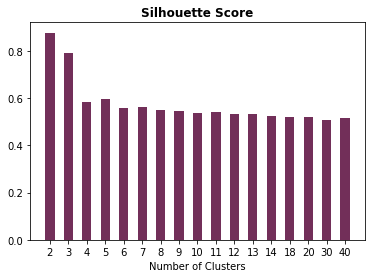

In [ ]:
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18,20,30,40]
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
data=pca_2_result
kmeans_model = KMeans()   
silhouette_scores = []
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
# fitting KMeans    
kmeans = KMeans(n_clusters=10)   
kmeans.fit(data)
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}


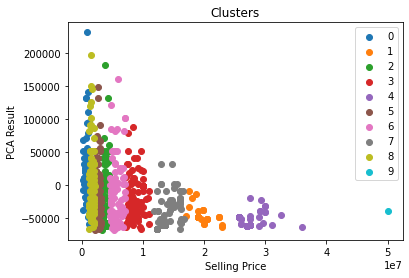

In [ ]:
for i, v in mydict.items():
  xLabel =[]
  yLabel=[]
  for index in v:
    xLabel.append([data[index][0]])
    yLabel.append([data[index][1]])
  x_c=np.array(xLabel)
  
  y_c=np.array(yLabel)
  plt.scatter(y_c[:100] , x_c[:100] , label = i)
plt.xlabel('Selling Price')
plt.ylabel('PCA Result')
plt.legend()
plt.title('Clusters')
plt.show()


In [ ]:
# getting the selling_price range from the obtained clusters
def getclasses(y):

  y_class_labels = np.zeros(y.shape[0])
  y_class_labels = y_class_labels.reshape(y.shape[0],1)
  for i in mydict.keys():
    for index in mydict[i]:
      y_class_labels[index][0] = i
  return y_class_labels

In [ ]:
y_train_class = getclasses(y_train)

In [ ]:
dt = DecisionTreeClassifier( random_state=0)
dt.fit(x_train,y_train_class)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dt.predict(x_train)

In [ ]:
def accuracy(y,y_pred):

  return (list(y_pred - y).count(0) / y_pred.shape[0])

In [ ]:
print(accuracy(y_pred, np.reshape(y_train_class, y_train_class.shape[0])))

0.9861696744813628


In [ ]:
y_test_pred = dt.predict(x_test)

In [ ]:
dt.get_depth()

28

In [ ]:
def getPredictionValues(ypred , xtest):
  minval = 10000000000000000000000000000000000000000000000
  index = 0
  for indexes in mydict[ypred]:
    val = np.sum(abs(x_train[indexes] - xtest))
    if(val<minval):
      minval = val
      index = indexes
  return y_train[index]


In [ ]:
test_final = []
for i in range(y_test_pred.shape[0]):
  y = getPredictionValues(y_test_pred[i], x_test[i])
  test_final.append(y)

In [ ]:
test_final[12]

4100000

In [ ]:
y_test[12]

4100000

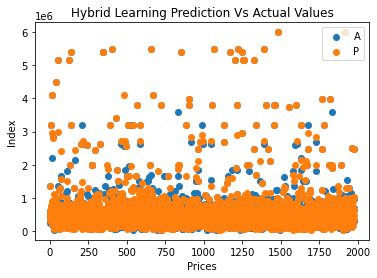

In [ ]:
index=[]
for i in range(len(test_final)):
  index.append(i)

plt.scatter(index,test_final)
plt.scatter(index,y_test)
plt.xlabel('Prices')
plt.ylabel('Index')
plt.legend('AP')
plt.title('Hybrid Learning Prediction Vs Actual Values')
plt.show()


In [ ]:
y_test_predictions = np.array(test_final)

In [ ]:
error = (np.sum((y_test - y_test_predictions)**2)/y_test.shape[0])**0.5

In [ ]:
error   

162689.5776069962

In [ ]:
x_train.shape

(5929, 10)

In [ ]:
year = float(input("Enter the year of manufacturing:"))
km_driven = float(input("Enter the km_driven:"))
fuel =int(input("Select FuelType\nEnter 0 for Diesel\nEnter 1 for Petrol\nEnter 2 for LPG\nEnter 3 for CNG\n"))
seller_type=int(input("Select SellerType\nEnter 0 for Individual\nEnter 1 for Dealer\nEnter 2 for Trustmark Dealer\n"))
transmission=int(input("Select TransmissionType\nEnter 0 for Manual\nEnter 1 for Automatic\n"))
owner=int(input("Select OwnerType\nEnter 0 for First Owner\nEnter 1 for Second Owner\nEnter 2 for Third Owner\nEnter 3 for Fourth & Above Owner\nEnter 4 for Test Drive Car\n"))
mileage=float(input("Enter the mileage:"))
engine=float(input("Enter the engine power:"))
max_power=float(input("Enter the max_power:"))
seats=float(input("Enter the seats:"))

inputVal=np.array([year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats])
inputVal=inputVal.reshape(1,10)
outputClass= dt.predict(inputVal)
print("The predicted price:",getPredictionValues(outputClass[0],inputVal))






Enter the year of manufacturing:2020
Enter the km_driven:124567
Select FuelType
Enter 0 for Diesel
Enter 1 for Petrol
Enter 2 for LPG
Enter 3 for CNG
3
Select SellerType
Enter 0 for Individual
Enter 1 for Dealer
Enter 2 for Trustmark Dealer
2
Select TransmissionType
Enter 0 for Manual
Enter 1 for Automatic
1
Select OwnerType
Enter 0 for First Owner
Enter 1 for Second Owner
Enter 2 for Third Owner
Enter 3 for Fourth & Above Owner
Enter 4 for Test Drive Car
56
Enter the mileage:105
Enter the engine power:100
Enter the max_power:150
Enter the seats:6
The predicted price: 3100000
